## Gradient Descent
*Gradient Descent* is an iterative method to find a local minimum of a function $f: \mathbb{R}^{d} \to \mathbb{R}$. The algorithm starts with an arbitrary estimate $\mathbf{x}^{(0)} \in \mathbb{R}^{d}$ and produces a sequence of estimates $\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \ldots$ according to the following update rule:
\begin{equation*}
    \mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - \alpha_t \nabla f(\mathbf{x}^{(t)}),
\end{equation*}
where $\alpha_t \in \mathbb{R}_{+}$ is called the *step size* (note that it is allowed to change in every iteration). Since the gradient of $f$ points in the direction of steepest ascent, subtracting the gradient updates the estimate towards the direction of steepest descent. The algorithm terminates when $\lVert \nabla f(\mathbf{x}^{(t)}) \rVert < \varepsilon$ for some small $\varepsilon > 0$, i.e., when it (approximately) reaches a critical point of $f$. Note that convergence is not guaranteed in the general case, so it makes sense to enforce a hard limit on the number of iterations.

In this exercise we are going to perform gradient descent on Himmelblau's function, a polynomial of degree four in two variables:
\begin{align}
    f: && \mathbb{R}^{2} &\to \mathbb{R}\\
    &&\left(\begin{matrix}x \\ y\end{matrix}\right) &\mapsto (x^2 + y - 11)^2 + (x + y^2 - 7)^2
\end{align}
Specifically, your tasks are as follows:
1. Implement the gradient descent method on Himmelblau's function. Your routine should return the whole list of iterates $\mathbf{x}^{(0)}, \mathbf{x}^{(1)}, \ldots$, so that you can also visualize the trajectory. The code skeleton already plots Himmelblau's function, so you can use the [`plot`](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots) method of Matplotlib's `Axes3D` object to draw the trajectory into the same figure. Choose $\mathbf{x}^{(0)}$ uniformly random from the square spanned by the two points $(\begin{matrix}-6 & -6\end{matrix})^T$ and $(\begin{matrix}6 & 6\end{matrix})^T$ and run the algorithm for several draws of $\mathbf{x}^{(0)}$.
2. Play around with the step size and visualize the result to see what happens.
3. Another popular method for finding local optima is called *Newton's Method*. It works exactly in the same way as gradient descent, except that the step size in the update formula is replaced by the inverse of the hessian matrix of $f$:
\begin{equation*}
    \mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - H_f(\mathbf{x}^{(t)})^{-1} \nabla f(\mathbf{x}^{(t)})
\end{equation*}
Implement Newton's method in the same way as you did for gradient descent including the visualization and run the cell for a few times to see what happens.
4. Compare the two methods. What differences did you notice regarding, for example, the number of iterations till convergence, the trajectories, etc.?
5. You have probably noticed by now that our simple version of Newton's method often ends up in saddle points or even the local maximum. One way of mitigating this is to perform the update step only if the hessian matrix $H_f(\mathbf{x}^{(t)})$ is positive definite and to fall back to a simple gradient descent update otherwise. Implement and visualize this 'improved' version of Newton's method.
6. Create a plot that visualises the trajectory for each of the three methods using a step size of 0.01, where applicable, and starting from the five different points that are deterministically generateded by the PRNG with seed 654321. Also print the final values for $x$ and $y$ (i.e., the supposed critical points) that the optimisation procedure outputs.

In [5]:
import numpy as np
import numdifftools as nd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D


def himmelblau_wrapper(func):
    """
    This decorator allows passing one array containing [x,y]
    to the functions instead of both parameters separately
    """
    def wrapper(x):
        return func(*x)
    
    return wrapper

@himmelblau_wrapper
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

@himmelblau_wrapper
def himmelblau_gradient(x, y):
    partial_derivative_x=4*x**3+4*x*y-42*x+2*y**2-14
    partial_derivative_y=4*y**3+4*x*y-26*y+2*x**2-22
    gradient_vector=[partial_derivative_x,partial_derivative_y]
    gradient_vector = np.array(gradient_vector)
    return gradient_vector
    

@himmelblau_wrapper
def himmelblau_hessian(x, y):
    func = lambda x : (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
    Hfun = nd.Hessian(func)
    h = Hfun([x, y])
    h = np.linalg.inv(h)
    return h
    


def gradient_descent(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=1000, eps=1e-7):
    # TODO: Optimize f
    hist=[]
    for i in range(max_iter):
        if (abs(f_gradient(x_0)[0])<eps or abs(f_gradient(x_0)[1])<eps):
            break
            return np.array(hist)
        else:
            hist.append([x_0[0],x_0[1],f(x_0)])
            x_0=x_0-step_size*f_gradient(x_0)
    return np.array(hist)

def newtons_method(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=100, eps=1e-7):
    hist=[]
    for i in range(max_iter):
        if (abs(f_gradient(x_0)[0])<eps or abs(f_gradient(x_0)[1])<eps):
            break
            return np.array(hist)
        else:
            hist.append([x_0[0],x_0[1],f(x_0)])
            x_0=x_0-np.dot(f_hessian(x_0),f_gradient(x_0))
    return np.array(hist)

def improved_newton(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=100, eps=1e-7):
    hist=[]
    for i in range(max_iter):
        if (abs(f_gradient(x_0)[0])<eps or abs(f_gradient(x_0)[1])<eps):
            break
            return np.array(hist)
        else:
            if(np.all(np.linalg.eigvals(f_hessian(x_0)) > 0)):
                hist.append([x_0[0],x_0[1],f(x_0)])
                x_0=x_0-np.dot(f_hessian(x_0),f_gradient(x_0))
            else:
                hist.append([x_0[0],x_0[1],f(x_0)])
                x_0=x_0-step_size*f_gradient(x_0)
    return np.array(hist)


## Part 1
<b>1. Implement the gradient descent method on Himmelblau's function. Your routine should return the whole list of iterates $\mathbf{x}^{(0)}, \mathbf{x}^{(1)}, \ldots$, so that you can also visualize the trajectory. The code skeleton already plots Himmelblau's function, so you can use the [`plot`](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots) method of Matplotlib's `Axes3D` object to draw the trajectory into the same figure. Choose $\mathbf{x}^{(0)}$ uniformly random from the square spanned by the two points $(\begin{matrix}-6 & -6\end{matrix})^T$ and $(\begin{matrix}6 & 6\end{matrix})^T$ and run the algorithm for several draws of $\mathbf{x}^{(0)}$.<b>

The number of iterations taken by gradient descent algorithm to converge towards local minima are 20


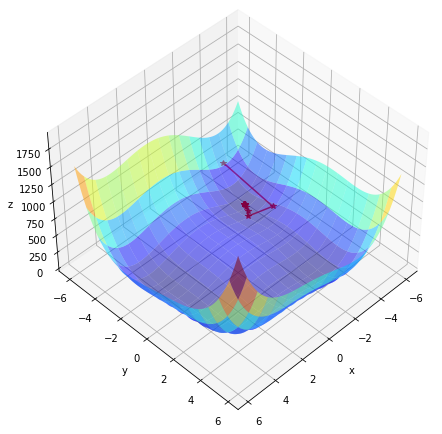

The number of iterations taken by gradient descent algorithm to converge towards local minima are 19


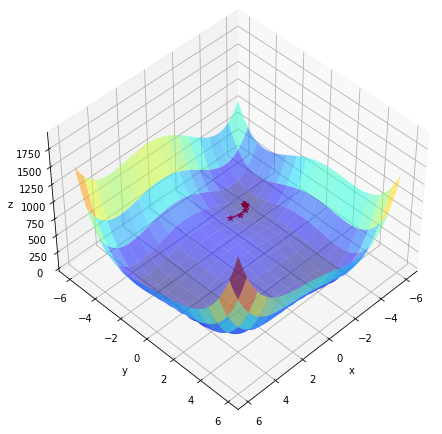

The number of iterations taken by gradient descent algorithm to converge towards local minima are 46


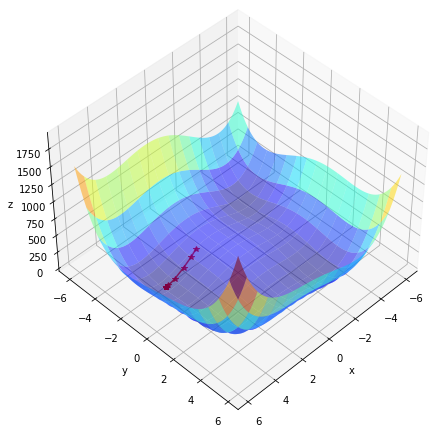

In [7]:
itr_gradient_descent=[]
for i in range(3):
    %matplotlib inline
    fig = plt.figure(figsize = (16,8))
    rng = np.random.default_rng()
    x_0 = rng.uniform(-6, 6,size=2)
    hist=gradient_descent(himmelblau, himmelblau_gradient, himmelblau_hessian,x_0, step_size=0.01, max_iter=1000, eps=1e-7)
    print("The number of iterations taken by gradient descent algorithm to converge towards local minima are {num}".format(num=len(hist)))
    itr_gradient_descent.append(len(hist))
    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, himmelblau([x,y]), rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
    ax.plot(hist[:,0],hist[:,1],hist[:,2], marker = '*', color = 'r', alpha = .8, label = 'Gradient descent')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(45, 45)
    
    plt.show()
    plt.close(fig)

## Part 2
<b>2. Play around with the step size and visualize the result to see what happens.<b>

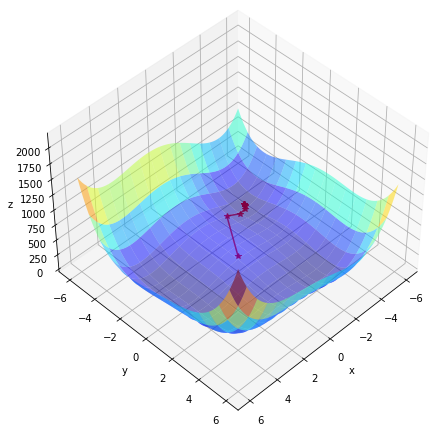

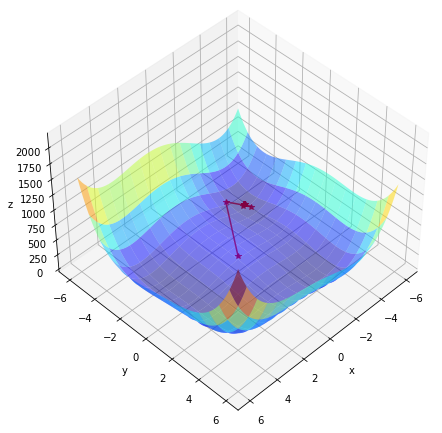

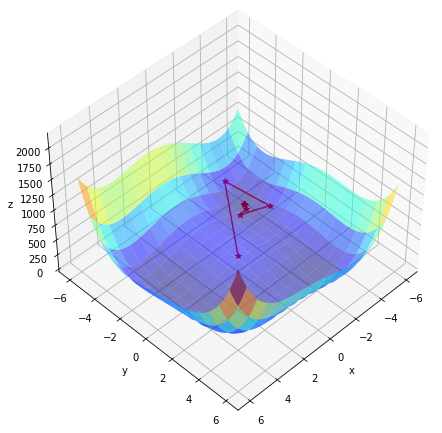

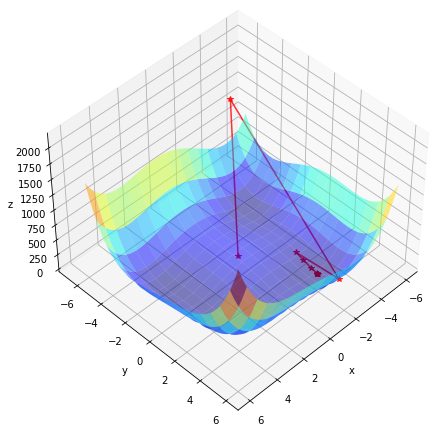

In [8]:
step_size_variation=[0.01,0.011,0.012,0.014]
for i in step_size_variation:
    %matplotlib inline
    fig = plt.figure(figsize = (16,8))
    hist=gradient_descent(himmelblau, himmelblau_gradient, himmelblau_hessian,[6,6], i, max_iter=1000, eps=1e-7)
    
    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, himmelblau([x,y]), rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
    ax.plot(hist[:,0],hist[:,1],hist[:,2], marker = '*', color = 'r', alpha = .8, label = 'Gradient descent')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(45, 45)
    
    plt.show()
    plt.close(fig)

## Part 3
<b> Another popular method for finding local optima is called *Newton's Method*. It works exactly in the same way as gradient descent, except that the step size in the update formula is replaced by the inverse of the hessian matrix of $f$:
\begin{equation*}
    \mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - H_f(\mathbf{x}^{(t)})^{-1} \nabla f(\mathbf{x}^{(t)})
\end{equation*}
Implement Newton's method in the same way as you did for gradient descent including the visualization and run the cell for a few times to see what happens.<b>

The number of iterations taken by gradient newtons method to converge towards local minima are 4


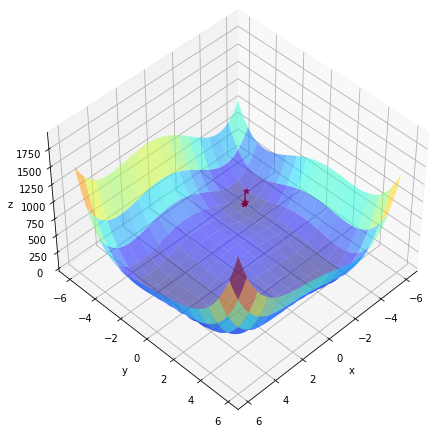

The number of iterations taken by gradient newtons method to converge towards local minima are 7


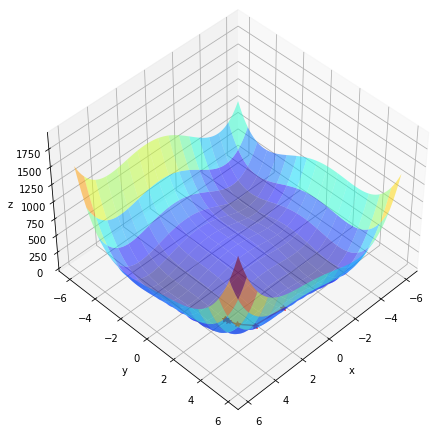

The number of iterations taken by gradient newtons method to converge towards local minima are 7


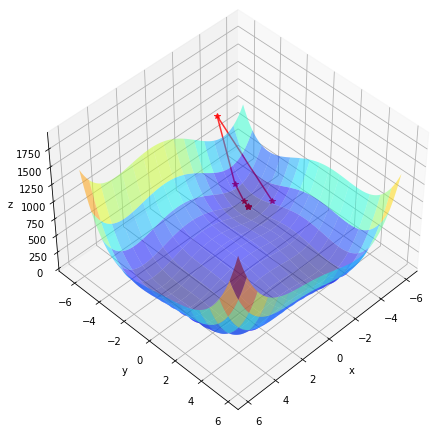

In [11]:
itr_Newton_Method=[]
for i in range(3):
    %matplotlib inline
    fig = plt.figure(figsize = (16,8))
    rng = np.random.default_rng()
    x_0 = rng.uniform(-6, 6,size=2)
    hist=newtons_method(himmelblau, himmelblau_gradient, himmelblau_hessian,x_0, step_size=0.01, max_iter=1000, eps=1e-7)
    print("The number of iterations taken by gradient newtons method to converge towards local minima are {num}".format(num=len(hist)))
    itr_Newton_Method.append(len(hist))
    
    
    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, himmelblau([x,y]), rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
    ax.plot(hist[:,0],hist[:,1],hist[:,2], marker = '*', color = 'r', alpha = .8, label = 'Gradient descent')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(45, 45)
    
    plt.show()
    plt.close(fig)

## Part 4
<b>Compare the two methods. What differences did you notice regarding, for example, the number of iterations till convergence, the trajectories, etc.?<b>

In [16]:
avg_NM=sum(itr_Newton_Method) / float(len(itr_Newton_Method))
avg_GD=sum(itr_gradient_descent) / float(len(itr_gradient_descent))
print("The average number of iterations taken by gradient descent algorithm to converge towards local minima are {num:.1f}".format(num=avg_GD))
print("The average number of iterations taken by gradient descent algorithm to converge towards local minima are {num}".format(num=avg_NM))

The average number of iterations taken by gradient descent algorithm to converge towards local minima are 28.3
The average number of iterations taken by gradient descent algorithm to converge towards local minima are 6.0


From the above result, we can conclude it takes only 6 steps for the newton method to converge towards relative minima on average
as compared to 36 steps taken by gradient descent. Gradient descent takes more steps as we already established but each step/iteration is fast because we only need to compute 1st derivatives, unlike the newton method where we need to compute 2nd derivatives too.
The trajectories of both methods differ by how they converge towards minima Gradient descent find local minima by moving along the direction of steepest descent while Newton's method takes into account curvature information and thereby often improves convergence.

## Part 5
<b>You have probably noticed by now that our simple version of Newton's method often ends up in saddle points or even the local maximum. One way of mitigating this is to perform the update step only if the hessian matrix $H_f(\mathbf{x}^{(t)})$ is positive definite and to fall back to a simple gradient descent update otherwise. Implement and visualize this 'improved' version of Newton's method.<b>

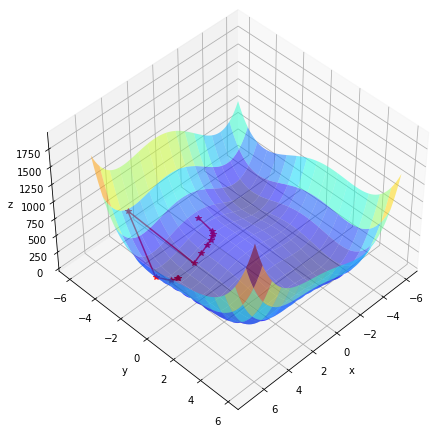

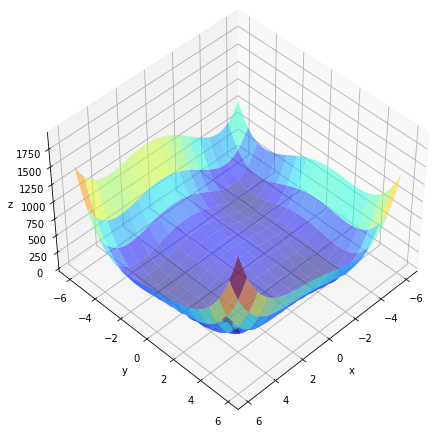

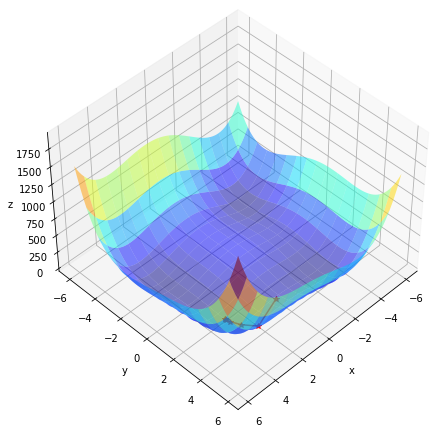

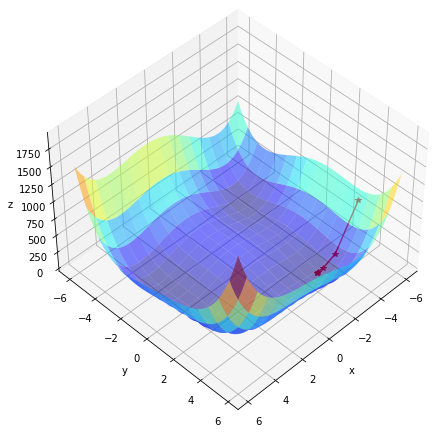

In [35]:
for i in range(4):
    %matplotlib inline
    fig = plt.figure(figsize = (16,8))
    rng = np.random.default_rng()
    x_0 = rng.uniform(-6, 6,size=2)
    hist=improved_newton(himmelblau, himmelblau_gradient, himmelblau_hessian,x_0, step_size=0.01, max_iter=1000, eps=1e-7)

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(x, y, himmelblau([x,y]), rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
    ax.plot(hist[:,0],hist[:,1],hist[:,2], marker = '*', color = 'r', alpha = .8, label = 'Gradient descent')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(45, 45)
    
    plt.show()
    plt.close(fig)

## Part 6
<B>Create a plot that visualises the trajectory for each of the three methods using a step size of 0.01, where applicable, and starting from the five different points that are deterministically generateded by the PRNG with seed 654321. Also print the final values for $x$ and $y$ (i.e., the supposed critical points) that the optimisation procedure outputs.<b>

gradient_descent
The critical point(relative minima) for Himmelblau's function at (-2.81,3.13) is 7.263262098046629e-14
The critical point(relative minima) for Himmelblau's function at (3.00,2.00) is 1.423412420884016e-15
The critical point(relative minima) for Himmelblau's function at (3.58,-1.85) is 2.2869690257348118e-14
The critical point(relative minima) for Himmelblau's function at (-3.78,-3.28) is 9.803223907454922e-16
The critical point(relative minima) for Himmelblau's function at (-3.78,-3.28) is 3.354639848607631e-16
newtons_method
The critical point(relative minima) for Himmelblau's function at (-3.07,-0.08) is 104.01516291755816
The critical point(relative minima) for Himmelblau's function at (3.00,2.00) is 1.1417681809044978e-08
The critical point(relative minima) for Himmelblau's function at (3.58,-1.85) is 3.864165985155676e-12
The critical point(relative minima) for Himmelblau's function at (-3.78,-3.28) is 2.960646186875776e-13
The critical point(relative minima) for 

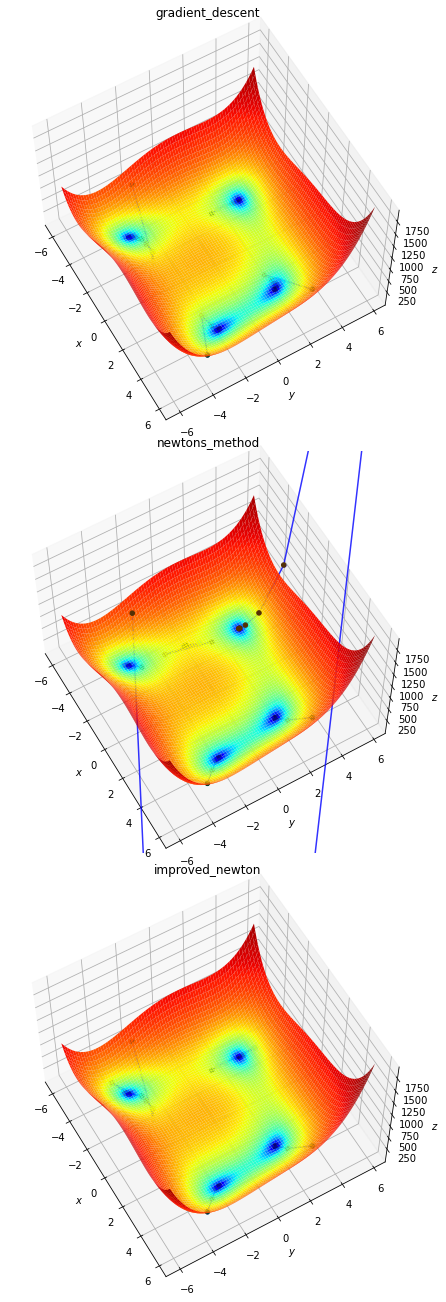

In [6]:

def make_himmelblau_plot(ax, x, y):
    ax.view_init(elev=60, azim=-30)
    ax.plot_surface(x, y, himmelblau([x,y]), cstride=1, rstride=1, norm=colors.LogNorm(), cmap=plt.cm.jet)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

x = np.arange(-6, 6, 0.15)
y = np.arange(-6, 6, 0.15)
x, y = np.meshgrid(x, y)

# Please don't change the start point generation for your submission
retries = 5
rng = np.random.default_rng(654321)
x_0 = rng.uniform(-6, 6, size=(retries, 2))


methods = [gradient_descent, newtons_method, improved_newton]

fig, axes = plt.subplots(len(methods), 1, figsize=(8, 18), subplot_kw=dict(projection='3d'))
for ax, method in zip(axes, methods):
    ax.set_title(method.__name__)
    make_himmelblau_plot(ax, x, y)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    z_min, z_max = ax.get_zlim()
    
    print(method.__name__)
    for t in range(retries):
        hist=method(himmelblau, himmelblau_gradient, himmelblau_hessian,x_0[t], step_size=0.01, max_iter=1000, eps=1e-7)
        print( "The critical point(relative minima) for Himmelblau's function at ({x1:.2f},{x2:.2f}) is {y}".format(x1=hist[len(hist)-1,0],x2=hist[len(hist)-1,1],y=hist[len(hist)-1,2]))
        ax.scatter3D(hist[:,0],hist[:,1],hist[:,2], c=hist[:,2], cmap='BrBG',depthshade=False)
        ax.plot(hist[:,0],hist[:,1],hist[:,2],'.b-',alpha=.8)
        
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

fig.tight_layout()
plt.show()
plt.close(fig)

##  time taken to complete task == 6 hours

Note: for clear visualization of trajectories, I have made some changes to the plot 
    